#**Customer Segmentation using Clustering** 

Dataset used : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from scipy.cluster import hierarchy
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
data = pd.read_csv("/content/marketing_campaign.csv",sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
print("Shape : ",data.shape)

Shape :  (2240, 29)


### Data Cleaning and Feature Engineering

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Checking for null values : 
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# Handling null values : 

# Rows with null income are dropped.
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [7]:
# Converting the Dt_Customer column to proper date format
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], infer_datetime_format=True)
print(data["Dt_Customer"].head(3))

0   2012-04-09
1   2014-08-03
2   2013-08-21
Name: Dt_Customer, dtype: datetime64[ns]


In [8]:
# Creating a new column Customer_For which tells the number of days they have been a customer relative to the last recorded date

# Finding the last recorded date : 
# All the date entries are in DATE TIME format so we extract only the DATE

dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

# Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

# Creating Customer_For feature
days = []
newestDate = max(dates) #relative to the newest customer
for i in dates:
    delta = newestDate - i
    days.append(delta)
data["Customer_For"] = days

# Converting to a numerical value -> days to nanoseconds
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce", downcast="integer")
print("After")
print(data["Customer_For"].head(3))

The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08
After
0    83894400000000000
1    10800000000000000
2    40780800000000000
Name: Customer_For, dtype: int64


In [9]:
#  Age from Date of Birth 
data["Age"] = 2023-data["Year_Birth"]

# Total amount spent on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

# Renaming columns
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [10]:
# Exploring and creating feature from categorical variables
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



In [11]:
# Creating LIVING_WITH feature with values : Alone or Partner
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [12]:
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [13]:
# Creating EDUCATION feature with values : Undergraduate, Graduate, Postgraduate
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [14]:
# Creating CHILDREN feature indicating the total children in the family
data["Children"]=data["Kidhome"]+data["Teenhome"]

# Creating FAMILY_SIZE feature indicating the total members in the family
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

# Creating IS_PARENT feature indicating whether the individual is a parent or not
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

In [15]:
# Dropping unnecessary and redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [16]:
# Data after cleaning 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [17]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,54.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,46.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,53.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,64.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,130.000000,2525.000000,3.000000,5.000000,1.000000


In [18]:
# Inference : 
# Since the dataset is old the max age is 130 which a sensible outliers
# Outliers are present in the Income column.
# The outliers in the data should be found using visualization

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

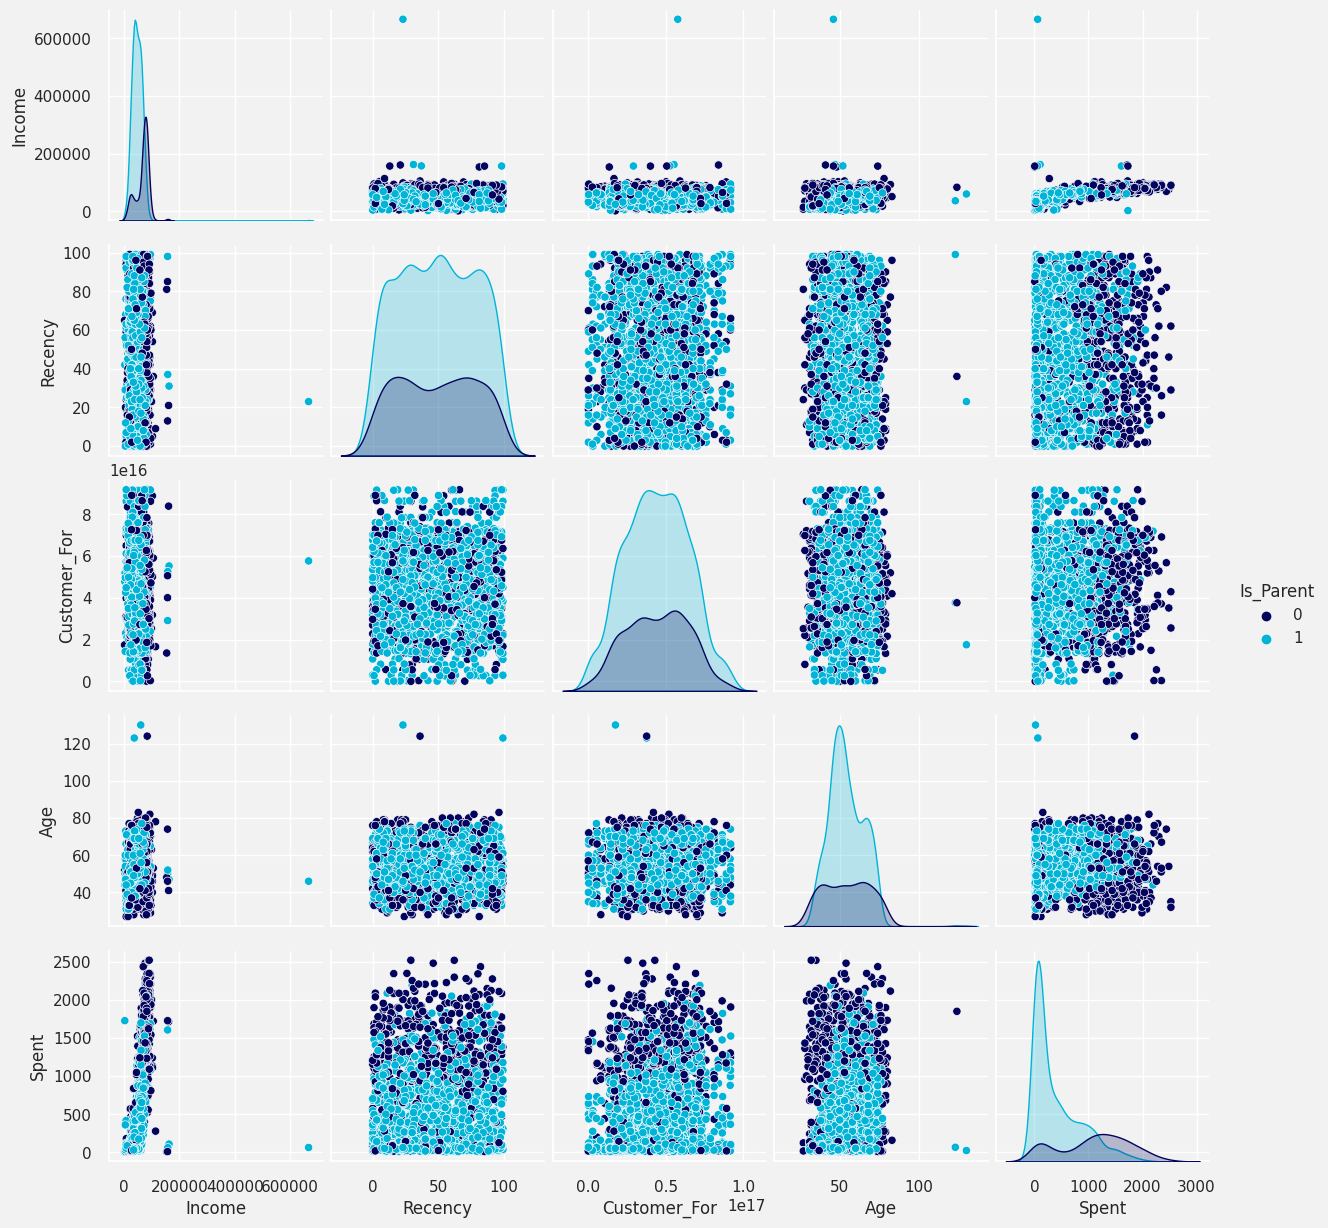

In [19]:
# Plotting some selected features : 

#Setting up colors preferences
sns.set(rc={"axes.facecolor":"#F2F2F2","figure.facecolor":"#F2F2F2"})
sns.color_palette("YlGnBu",as_cmap=True)

#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Relative Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#03045e","#00b4d8"]))
plt.show()

In [20]:
# Removing the outliers

data[(data["Age"]<90)].count()
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2215


<Axes: >

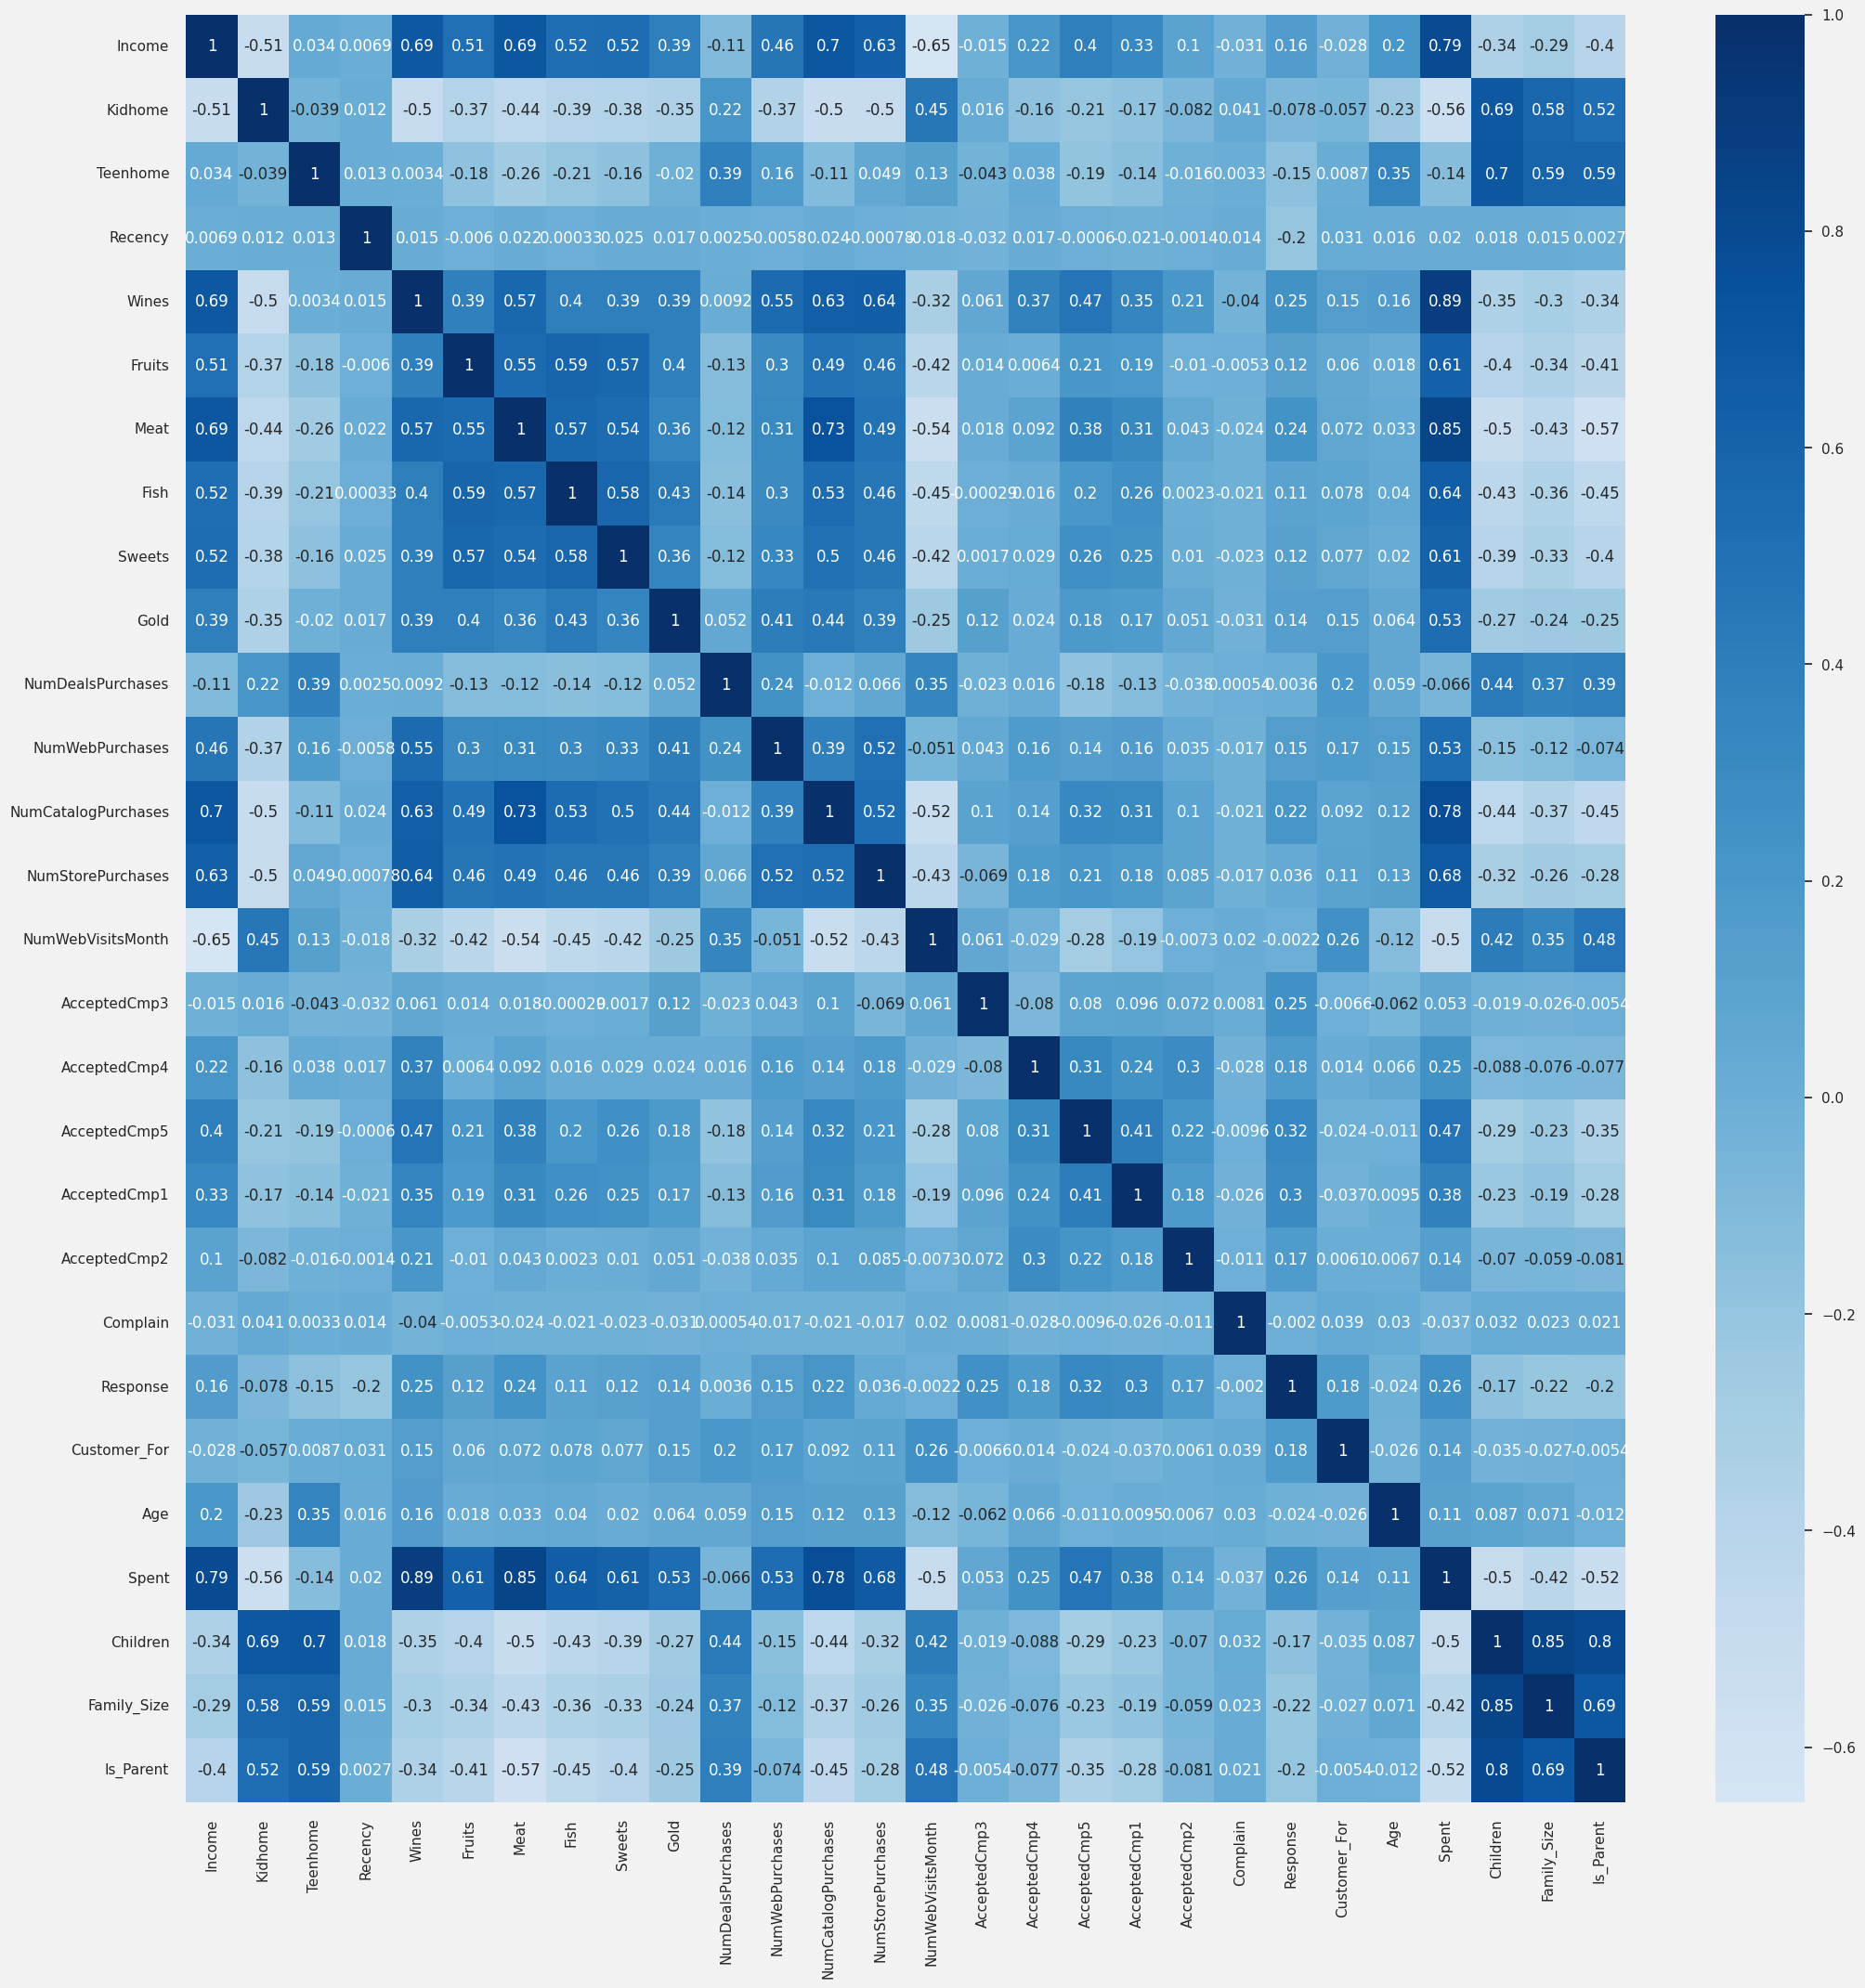

In [21]:
# Correlation Matrix

corrmat= data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corrmat,annot=True, cmap='Blues', center=0)

# Data Preprocessing



*   Label Encoding
*   Standardization
*   Dimensionality Reduction



In [22]:
# Label Encoding : 

s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

Categorical variables in the dataset: ['Education', 'Living_With']
All features are now numerical


In [23]:
# Standardization : 

# Creating a copy of data
ds = data.copy()

# Creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
            'AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

# Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [24]:
# After Scaling : 
scaled_ds.head(5)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.894550,0.286604,-0.822585,-0.929363,0.310113,0.977779,1.548973,1.689714,2.453932,1.484340,...,2.504074,-0.554500,0.693215,1.974933,0.986016,1.675011,-1.348357,-1.264487,-1.758153,-1.580889
1,-0.894550,-0.261407,1.040427,0.908618,-0.380899,-0.872375,-0.637338,-0.718196,-0.651178,-0.634081,...,-0.571253,-1.169839,-0.131420,-1.664631,1.236344,-0.962727,-1.348357,1.405522,0.450131,0.632555
2,-0.894550,0.912723,-0.822585,-0.929363,-0.795506,0.358096,0.568903,-0.178646,1.339745,-0.147087,...,-0.229550,1.291518,-0.543738,-0.171808,0.318476,0.279830,0.741643,-1.264487,-0.654011,-1.580889
3,-0.894550,-1.176680,1.040427,-0.929363,-0.795506,-0.872375,-0.561948,-0.655768,-0.505056,-0.585381,...,-0.912956,-0.554500,0.280897,-1.922757,-1.266933,-0.919594,0.741643,0.070517,0.450131,0.632555
4,0.568839,0.293806,1.040427,-0.929363,1.553934,-0.392047,0.418123,-0.218777,0.152497,-0.000989,...,0.112153,0.060839,-0.131420,-0.821423,-1.016605,-0.307440,0.741643,0.070517,0.450131,0.632555


### Principal Component Analysis

Text(0.5, 1.0, 'Scree Plot')

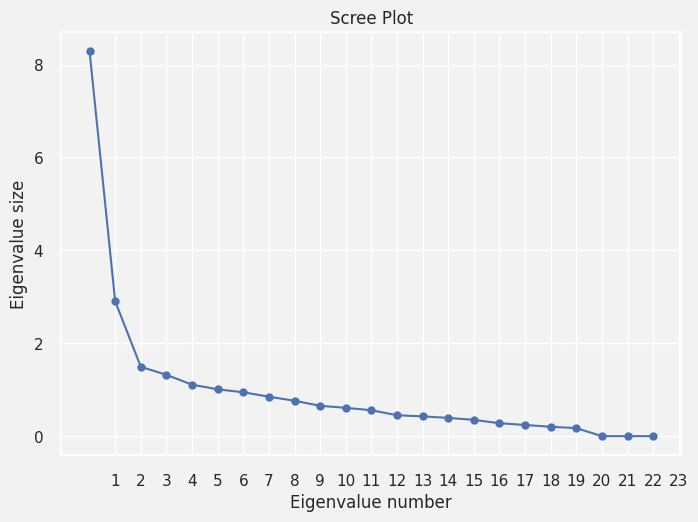

In [25]:
# Identifying the number of dimensions to proceed with 

# Initially using all the dimensions
pca = PCA(n_components=None)
pca.fit(scaled_ds)

# Plotting the scree plot 
# plt.style.use("ggplot")
plt.xticks([i for i in range(1,24)])
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [26]:
# #Initiating PCA to reduce dimentions aka features to 3

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2215.0,-1.283147e-17,2.878871,-5.969904,-2.536835,-0.781744,2.384980,7.441981
col2,2215.0,0.000000e+00,1.704159,-4.305663,-1.321027,-0.160330,1.231766,6.136731
col3,2215.0,-7.698883e-17,1.222061,-3.507546,-0.827583,-0.020431,0.798334,6.619322


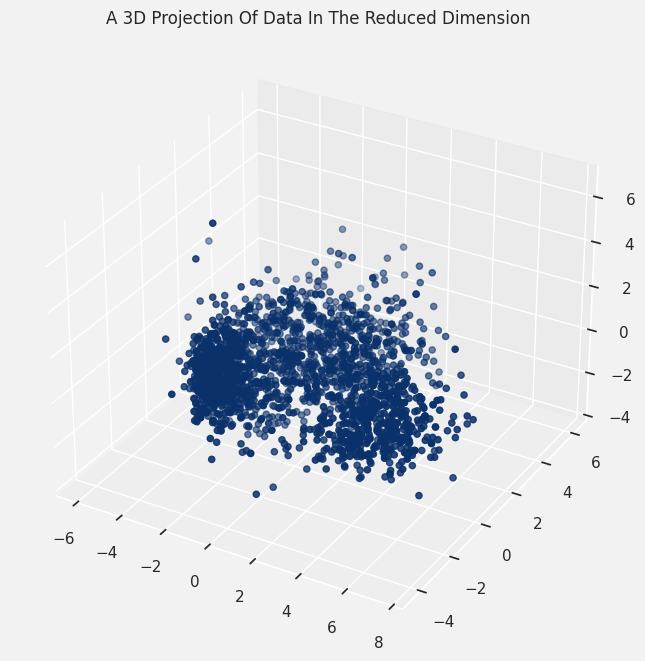

In [27]:
# A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="#0b316a", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

## Determining Number of Clusters

Elbow Method to determine the number of clusters to be formed:


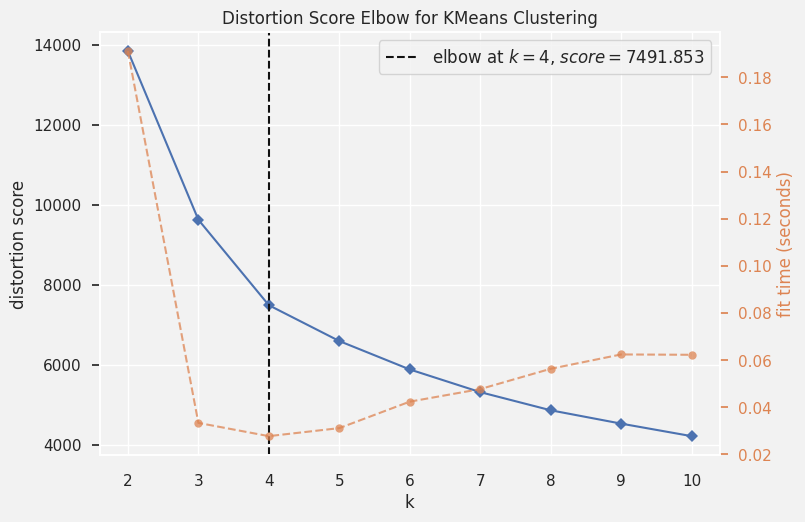

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Elbow method to find numbers of clusters to make.

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

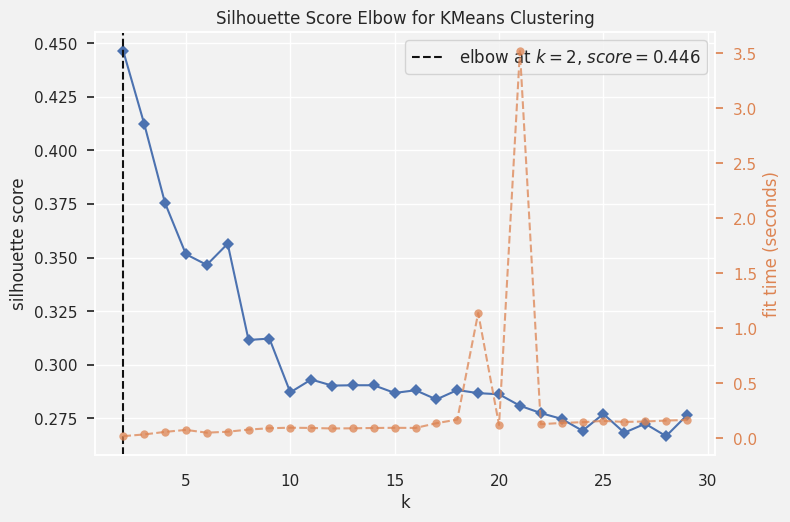

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [29]:
# Silhouette Score for K means

# k is range of number of clusters.
visualizer = KElbowVisualizer(KMeans(), k=(2,30),metric='silhouette', timings= True)
visualizer.fit(PCA_ds)        # Fit the data to the visualizer
visualizer.show()

### DBSCAN

In [30]:
# Import the required libraries
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Fit the model to the PCA-transformed dataset
pca = PCA(n_components=2)
pca_ds = pca.fit_transform(scaled_ds)

# Initialize the DBSCAN clustering model
dbscan = DBSCAN(eps=0.5, min_samples=15)
dbscan.fit(pca_ds)

# Extract the predicted cluster labels
labels = dbscan.labels_

# Add the cluster labels to the original dataset
data['Clusters'] = labels

In [31]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters generated by DBSCAN: {n_clusters}")

Number of clusters generated by DBSCAN: 3


## Gaussian Mixture

In [34]:
from sklearn.mixture import GaussianMixture

# Initialize the Gaussian mixture model with 4 components
gmm = GaussianMixture(n_components=4)

# Fit the model to the PCA-transformed dataset and extract the predicted cluster labels
pca1 = PCA(n_components=2)
pca_ds1 = pca1.fit_transform(scaled_ds)
labels1 = gmm.fit_predict(pca_ds1)

# Add the cluster labels to the PCA-transformed dataset
pca_ds1 = pd.DataFrame(pca_ds1, columns=['PC1', 'PC2'])
pca_ds1['Cluster'] = labels1

# Merge the PCA-transformed dataset back into the original dataset and save to disk
data = pd.concat([data, pca_ds1], axis=1)
data.to_csv('data_with_clusters.csv', index=False)


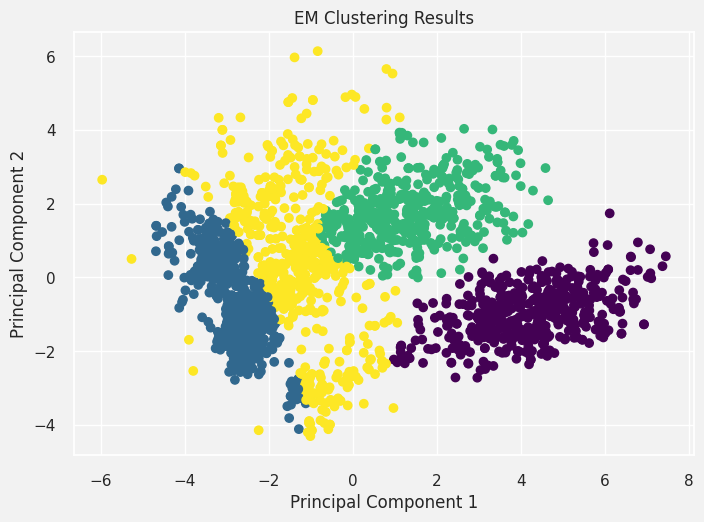

In [35]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA-transformed dataset with points colored by cluster label
plt.scatter(pca_ds1['PC1'], pca_ds1['PC2'], c=labels1, cmap='viridis')
plt.title('EM Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## K- Means Clustering

In [38]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.datasets import make_blobs

In [39]:
X, y = make_blobs(n_samples=150, 
                  centers=3, 
                  cluster_std=.45, 
                  random_state = 0)

In [40]:
import plotly.express as px
import pandas as pd

# Convert to dataframe:
dfBlobs = pd.DataFrame(PCA_ds, columns = ['col1','col2'])
x =PCA_ds["col1"]
y =PCA_ds["col2"]
# z =PCA_ds["col3"]
# Plot data:
plot = px.scatter(dfBlobs, x, y)
plot.update_layout(   
    title={'text':"K-Means Visualization",
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
plot.show()

In [41]:
from sklearn.cluster import k_means
x = {'X':PCA_ds["col1"], 'Y':PCA_ds["col2"]}
df =  pd.DataFrame(x)
km = k_means(df, n_clusters=3)
km

(array([[-2.36667578, -0.68902064],
        [ 0.58170957,  1.92904644],
        [ 4.13769667, -0.88416761]]),
 array([2, 0, 2, ..., 2, 1, 0], dtype=int32),
 6378.168731430211)

## Agglomerative Clustering

In [75]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
# data["Clusters"]= yhat_AC

In [76]:
from sklearn.metrics import silhouette_score
labels_=AC.labels_
silhouette_score = silhouette_score(PCA_ds, labels)
print("The silhouette score is: ", silhouette_score)

The silhouette score is:  0.18856115411477986


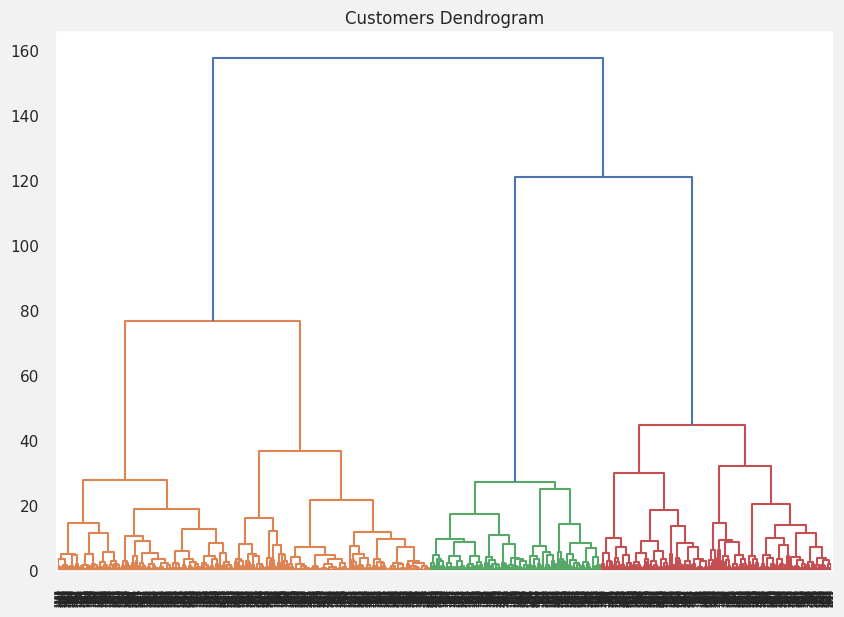

In [59]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

selected_data = PCA_ds
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

## Evaluating Models 

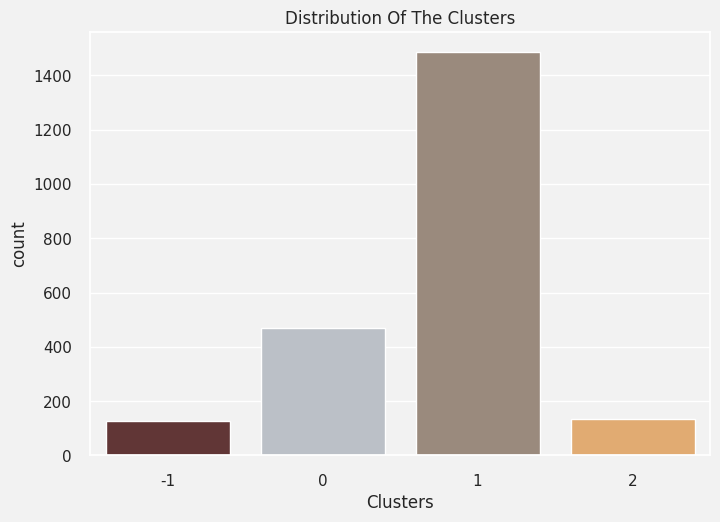

In [32]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

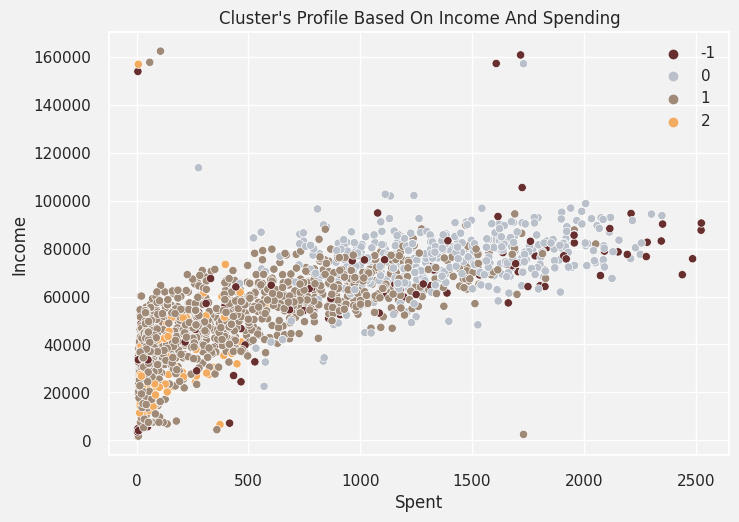

In [33]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

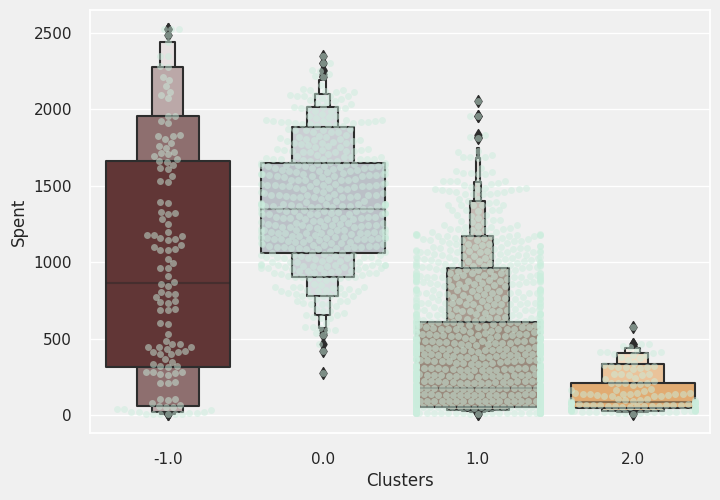

In [78]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

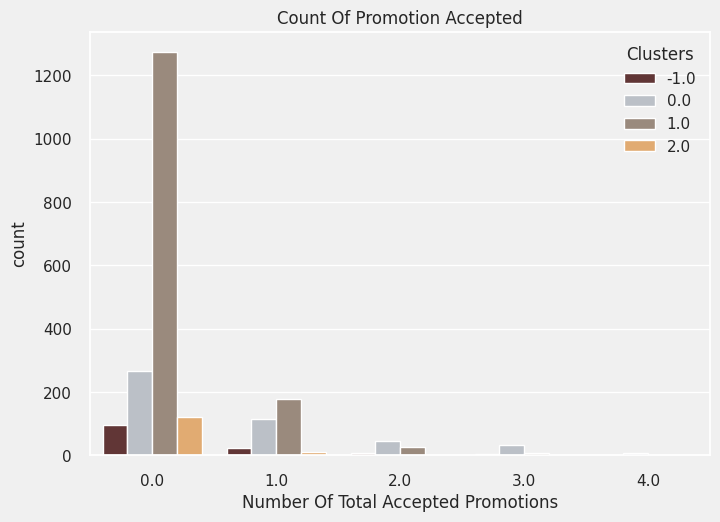

In [79]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

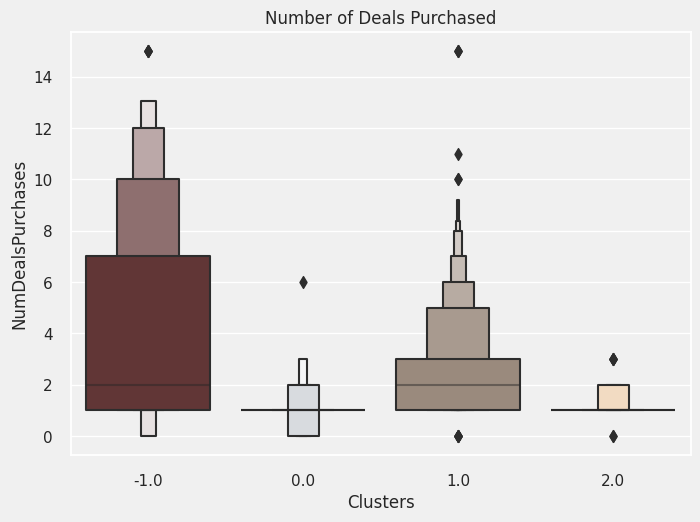

In [80]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

## Profiling

<Figure size 800x550 with 0 Axes>

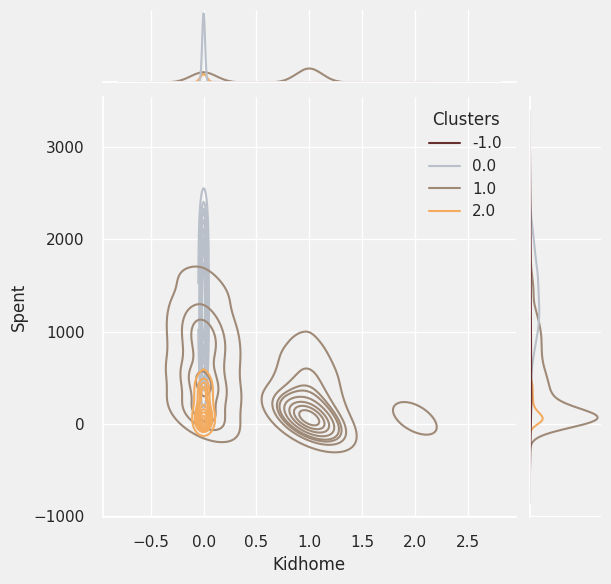

In [60]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]
sns.set(rc={"axes.facecolor":"#F0F0F0","figure.facecolor":"#F0F0F0"})
plt.figure()
sns.jointplot(x=data["Kidhome"], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
plt.show()

<Figure size 800x550 with 0 Axes>

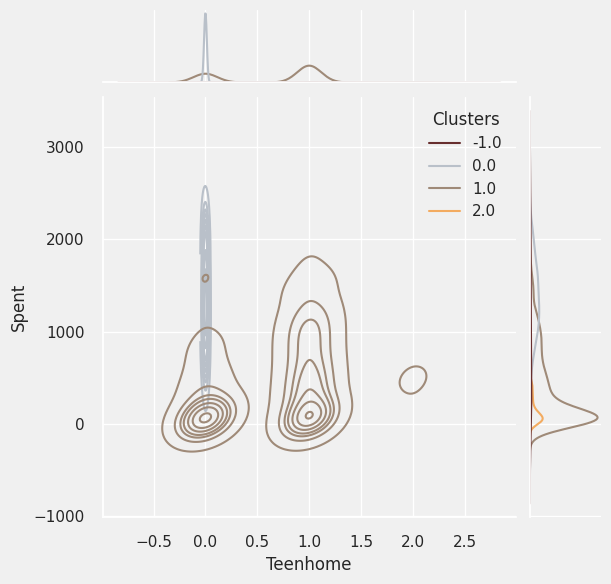

In [77]:
plt.figure()
sns.jointplot(x=data["Teenhome"], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
plt.show()

<Figure size 800x550 with 0 Axes>

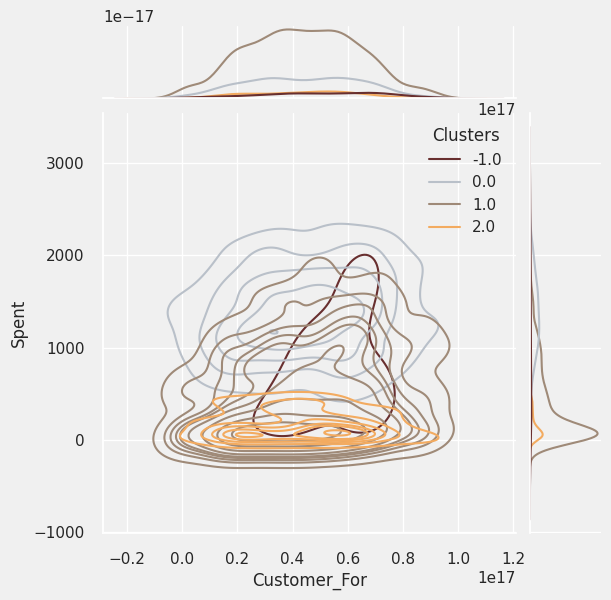

In [62]:
plt.figure()
sns.jointplot(x=data["Customer_For"], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
plt.show()

<Figure size 800x550 with 0 Axes>

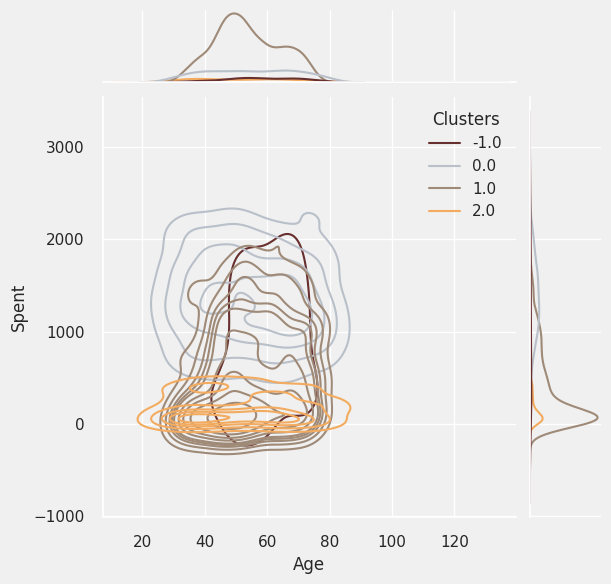

In [63]:
plt.figure()
sns.jointplot(x=data["Age"], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
plt.show()

<Figure size 800x550 with 0 Axes>

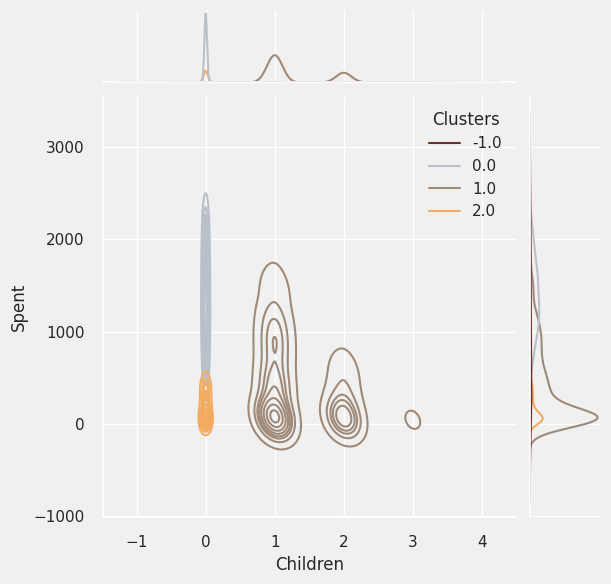

In [64]:
plt.figure()
sns.jointplot(x=data["Children"], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
plt.show()

<Figure size 800x550 with 0 Axes>

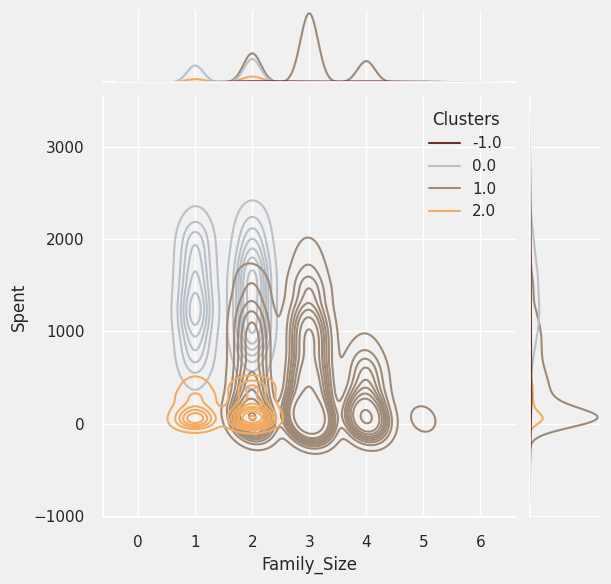

In [65]:
plt.figure()
sns.jointplot(x=data["Family_Size"], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
plt.show()

# Inferences

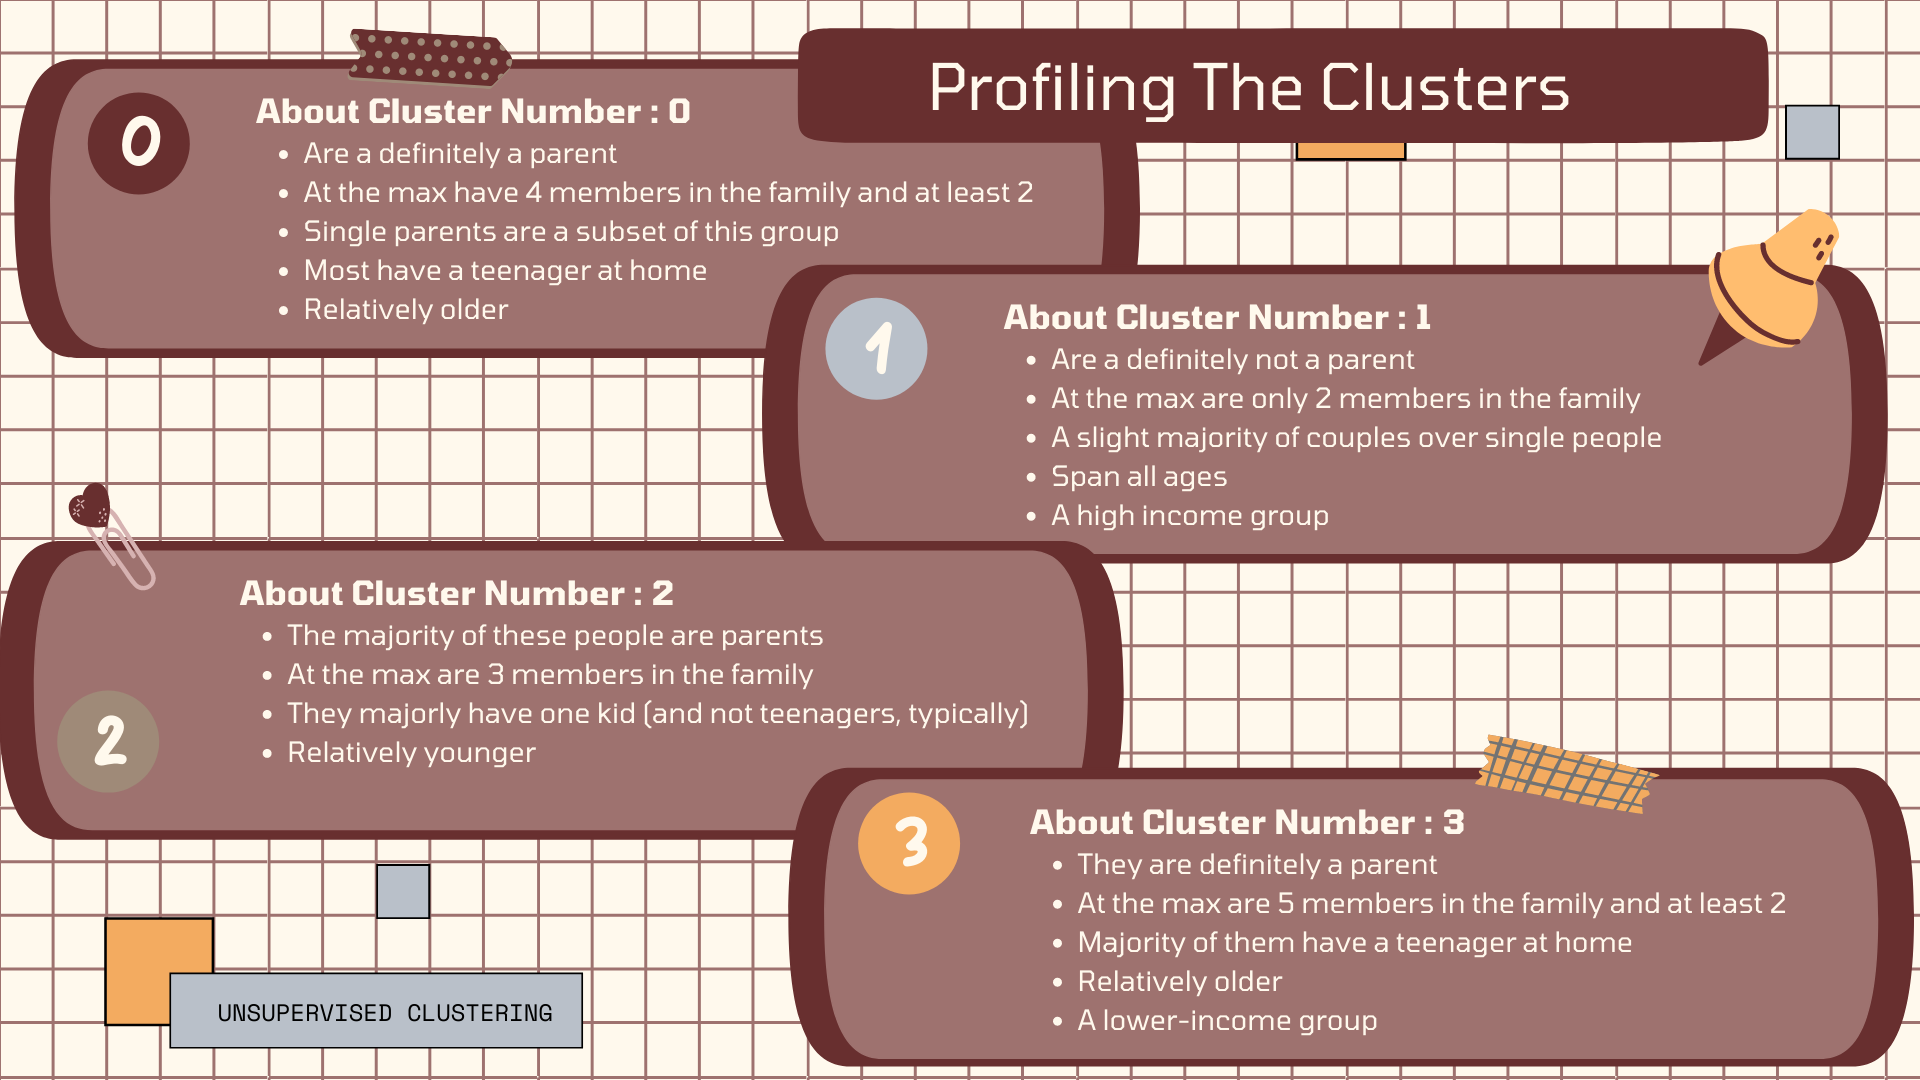